# Análise qualitativa e quantitativa de dados
> Resumo das principais medidas estatísticas e alguns estudos de caso.

- toc: false
- badges: true
- comments: true
- categories: [analise, dados]
- author: Lucas Tiago
- image: 

## Carregando as bibliotecas necessárias

In [1]:
import pandas as pd
from scipy.stats import mode, skewtest, variation, normaltest, skew
import numpy as np
from numpy import median, var, std
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Carregando base de dados utilizando o pacote `pandas`.

In [2]:
df = pd.read_excel(r'C:\Users\lucas\Desktop\People_Analytics.xlsx',
                                sheet_name= 'BaseDados', index_col = 'N')
df

,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia
N,,,,,,
1,solteiro,1-ensino fundamental,NaN,4.00,26,interior
2,casado,1-ensino fundamental,1.0,4.56,32,capital
3,casado,1-ensino fundamental,2.0,5.25,36,capital
4,solteiro,2-ensino medio,NaN,5.73,20,outra
5,solteiro,1-ensino fundamental,NaN,6.26,40,outra
6,casado,1-ensino fundamental,0.0,6.66,28,interior
7,solteiro,1-ensino fundamental,NaN,6.86,41,interior
8,solteiro,1-ensino fundamental,NaN,7.39,43,capital
9,casado,2-ensino medio,1.0,7.59,34,capital


## Análise exploratória inicial

O método `info` mosta algumas informações como os tipos das variáveis, quantidade de dados não nulos e as colunas do dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   estado_civil     36 non-null     object 
 1   grau_instrucao   36 non-null     object 
 2   n_filhos         20 non-null     float64
 3   salario          36 non-null     float64
 4   idade_anos       36 non-null     int64  
 5   reg_procedencia  36 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ KB


## Transformação das variáveis categoricas

Para que o pandas identifique quais são as variáveis que são consideradas categoricas para necessário fazer essa distinção.

In [4]:
df[['estado_civil', 'grau_instrucao', 'reg_procedencia']] = df[['estado_civil', 'grau_instrucao', 'reg_procedencia']].astype('category')

DataFrame com as variáveis categóricas classificadas.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   estado_civil     36 non-null     category
 1   grau_instrucao   36 non-null     category
 2   n_filhos         20 non-null     float64 
 3   salario          36 non-null     float64 
 4   idade_anos       36 non-null     int64   
 5   reg_procedencia  36 non-null     category
dtypes: category(3), float64(2), int64(1)
memory usage: 1.5 KB


## Distribuição do grau de instrução

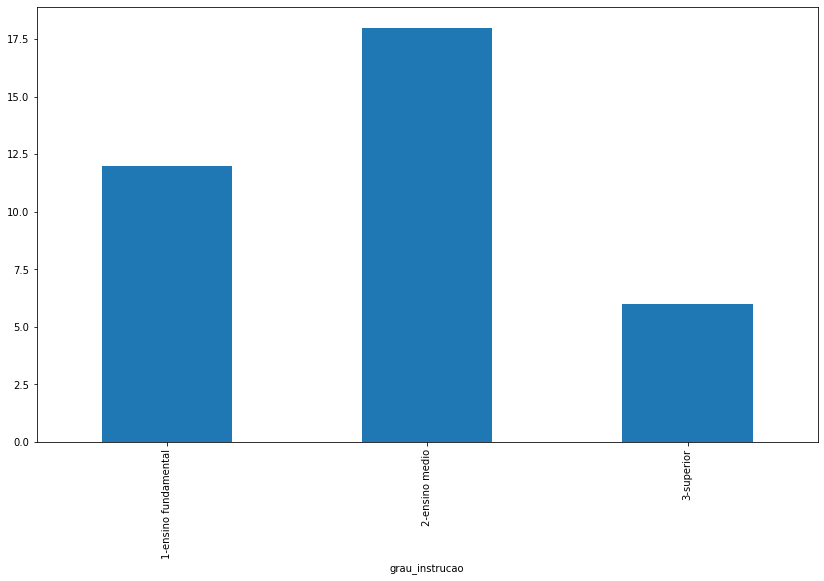

In [6]:
df.groupby('grau_instrucao').size().plot.bar(figsize=(14,8))

## Boxplot (Seaborn)

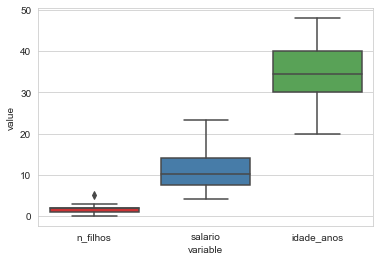

In [13]:
df_melted = df[['n_filhos', 'salario', 'idade_anos']].melt()
sns.set_style(style='whitegrid')
sns.boxplot(data=df_melted, x='variable', y='value', palette='Set1')
sns.set(rc={'figure.figsize':(14,8)})

## Resumo estastístico 

A função describe tem a função de retornar variáveis como: contagem, média, desvio padrão, valor mínimo, quartis, média, mediana e máximo.

In [7]:
df.describe()

,n_filhos,salario,idade_anos
count,20.000000,36.000000,36.000000
mean,1.650000,11.122222,34.583333
std,1.268028,4.587458,6.737422
min,0.000000,4.000000,20.000000
25%,1.000000,7.552500,30.000000
50%,2.000000,10.165000,34.500000
75%,2.000000,14.060000,40.000000
max,5.000000,23.300000,48.000000


## Funções estatísticas

### Média

In [8]:
print(df[['n_filhos', 'salario', 'idade_anos']].min())
print(20*'_')
print(df[['n_filhos', 'salario', 'idade_anos']].max())

n_filhos       0.0
salario        4.0
idade_anos    20.0
dtype: float64
____________________
n_filhos       5.0
salario       23.3
idade_anos    48.0
dtype: float64


In [9]:
df.mean()

n_filhos       1.650000
salario       11.122222
idade_anos    34.583333
dtype: float64

### Mediana

In [10]:
print('A mediana do número de filhos é: %i' % median(df[['n_filhos']].dropna(axis=0)))
print('A mediana do salário é: %.2f' % median(df[['salario']]))
print('A mediana da idade é: %.2f' % median(df[['idade_anos']]))

A médiana do número de filhos é: 2
A médiana do salário é: 10.16
A médiana da idade é: 34.50


### Moda

In [11]:
for i in df.columns:
    print('A moda para a coluna', str(i),'é:', mode(df[i])[0][0])

A moda para a coluna estado_civil é: casado
A moda para a coluna grau_instrucao é: 2-ensino medio
A moda para a coluna n_filhos é: 2.0
A moda para a coluna salario é: 4.0
A moda para a coluna idade_anos é: 26
A moda para a coluna reg_procedencia é: outra


### Coeficiente de assimetria

In [14]:
for i in ['n_filhos', 'salario', 'idade_anos']:
    print('O coeficiente de assimetria da coluna %s é: %.2f' % (i, skew(df[i].dropna(axis=0))))

O coeficiente de assimetria da coluna n_filhos é: 0.69
O coeficiente de assimetria da coluna salario é: 0.63
O coeficiente de assimetria da coluna idade_anos é: -0.06


## Variância Populacional

A variância populacional é a média aritmética dos desvios dos dados em relação a média.

A função que será utilizada é `var` do numpy, documentação no link: https://numpy.org/doc/stable/reference/generated/numpy.var.html?highlight=var#numpy.var.

In [15]:
var(df)

n_filhos       1.527500
salario       20.460190
idade_anos    44.131944
dtype: float64

## Desvio padrão Populacional

O desvio padrão populacional é a raiz quadrada da variância populacional.

A função utilizada é `std` do numpy, a documentação segue no link: https://numpy.org/doc/stable/reference/generated/numpy.std.html?highlight=std#numpy.std.

In [16]:
std(df)

n_filhos      1.235921
salario       4.523294
idade_anos    6.643188
dtype: float64

## Variância Amostral

A variância amostral é calculada praticamente igual a populacinal, todavia apresenta um penalidade de uma unidade no denominador.

Para calcular a variância amostral é somente penalizar o denominador, que é realizada acrescentando o argumento `ddof = 1` na função `var`.

In [17]:
var(df, ddof=1)

n_filhos       1.607895
salario       21.044766
idade_anos    45.392857
dtype: float64

## Desvio padrão amostral

O desvio padrão amostral é a raiz quadrada da variância amostral.

In [18]:
std(df, ddof=1)

n_filhos      1.268028
salario       4.587458
idade_anos    6.737422
dtype: float64

## Coeficiente de variação

O coeficiente de variação é a variação relativa entre o desvio padrão e a média dos dados.

A documentação da função `variation` no Scipy está no link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.variation.html#scipy.stats.variation

In [19]:
for i in ['n_filhos', 'salario', 'idade_anos']:
    print('O coeficiente de assimetria da coluna %s é: %.4f' % (i, variation(df[i].dropna(axis=0))))

O coeficiente de assimetria da coluna n_filhos é: 0.7490
O coeficiente de assimetria da coluna salario é: 0.4067
O coeficiente de assimetria da coluna idade_anos é: 0.1921


In [20]:
variation(df[['n_filhos', 'salario', 'idade_anos']], nan_policy='omit')

masked_array(data=[0.7490428542005015, 0.40668977913210774,
                   0.19209217799876416],
             mask=[False, False, False],
       fill_value=1e+20)

# Problema 1

Carregando a base de dados de clientes de uma financeira.

In [21]:
df_cred = pd.read_excel(r"C:\Users\lucas\Desktop\Exercícios.xlsx", sheet_name='Base de Dados 1')
df_cred.head()

,Código do Cliente,Idade,Rendimento Total,Salário,Limite de Crédito Imediato,Limite do Cheque Especial
0,12,72,4300.0,4300.0,2000,1000
1,44,75,4400.0,4400.0,3000,1000
2,30,66,4800.0,4800.0,440,1500
3,2,35,5000.0,5000.0,1000,1000
4,35,69,5000.0,5000.0,2000,2500


Resumo estastístico.

In [22]:
df_cred.describe()

,Código do Cliente,Idade,Rendimento Total,Salário,Limite de Crédito Imediato,Limite do Cheque Especial
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000
mean,24.50,60.979167,12275.073750,10507.115417,2175.208333,5620.729167
std,14.00,15.049549,12640.653748,9332.171094,938.094469,6131.900367
min,1.00,30.000000,4300.000000,4027.000000,340.000000,500.000000
25%,12.75,47.000000,6380.000000,5950.000000,1925.000000,2262.500000
50%,24.50,66.000000,8400.000000,7400.000000,2000.000000,3550.000000
75%,36.25,70.000000,12378.135000,10163.000000,3000.000000,6500.000000
max,48.00,94.000000,81000.000000,54500.000000,3500.000000,35000.000000


Não temos na base de dados valores faltantes (`null`).

In [23]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Código do Cliente           48 non-null     int64  
 1   Idade                       48 non-null     int64  
 2   Rendimento Total            48 non-null     float64
 3   Salário                     48 non-null     float64
 4   Limite de Crédito Imediato  48 non-null     int64  
 5   Limite do Cheque Especial   48 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.4 KB


Qual a idade média dos clientes presentes no banco de dados? 

In [24]:
print('A idade média dos clientes é: %.2f' % df_cred.Idade.mean())

A idade média dos clientes é: 60.98


In [25]:
df_cred.Idade.describe()

count    48.000000
mean     60.979167
std      15.049549
min      30.000000
25%      47.000000
50%      66.000000
75%      70.000000
max      94.000000
Name: Idade, dtype: float64

- Mínimo = 30
- Máximo = 94
- Mediana = 66
- 1º Quartil = 47
- 3º Quartil = 70

Existem clientes com idades discrepantes? Analise o boxplot.


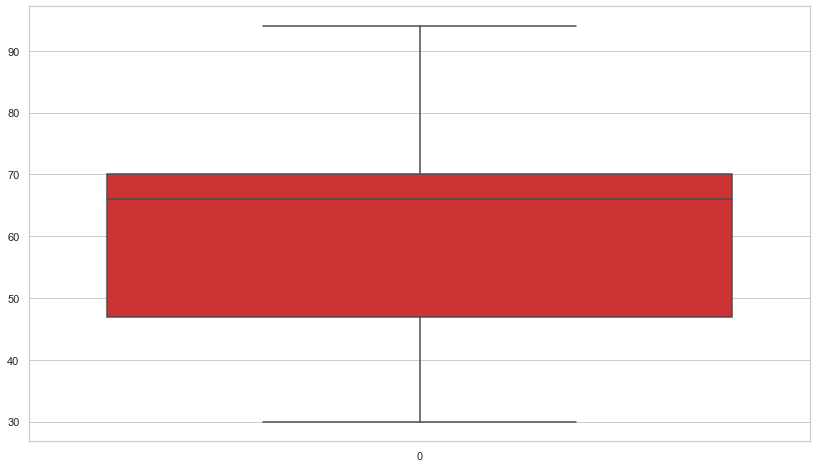

In [26]:
sns.set_style(style='whitegrid')
sns.boxplot(data=df_cred.Idade, palette='Set1')
sns.set(rc={'figure.figsize':(14,8)})

Existem clientes que possuem rendimento total discrepante em relação aos demais clientes? Analise o boxplot. 

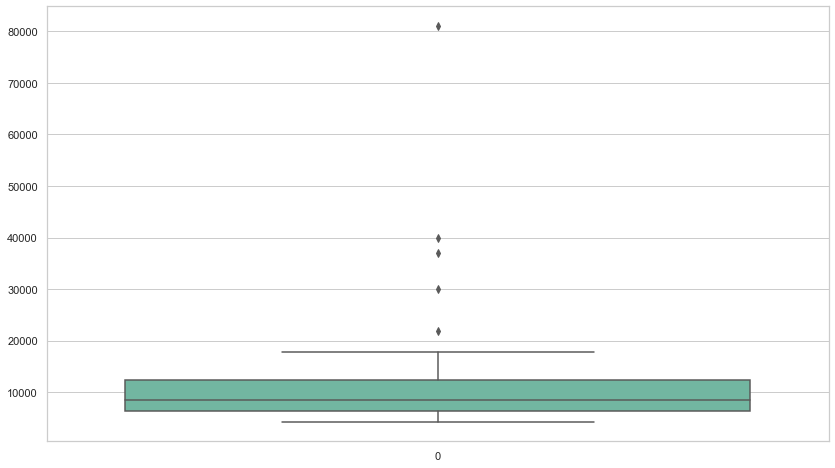

In [27]:
sns.set_style(style='whitegrid')
sns.boxplot(data=df_cred['Rendimento Total'], palette='Set2')
sns.set(rc={'figure.figsize':(14,8)})

A partir de qual valor o rendimento é considerado discrepante?

In [28]:
#LIMITE SUPERIOR
2.5*df_cred['Rendimento Total'].describe()[6] - 1.5*df_cred['Rendimento Total'].describe()[4]

21375.3375

LS = Q3 + 1.5 * IIQ = Q3 + 1.5 (Q3 - Q1) = 2.5 * Q3 - 1.5 * Q1

In [29]:
#LIMITE INFERIOR
1.5*df_cred['Rendimento Total'].describe()[4] - 0.5*df_cred['Rendimento Total'].describe()[6]

3380.9325

A variável rendimento total pode ser considerada simétrica?

In [30]:
skew(df_cred['Rendimento Total'])

3.8524193953606383

**Resposta:** Não, pois para ser considereada simetrica o coeficiente de assimetria (skewness) deverá ser próximo de zero. Que nesse caso indica que a distribuição tem uma calda a direita e a média é maior que a mediana, pois tem um valor é positivo.

Existem clientes que possuem salário discrepante em relação aos demais clientes? Analise o boxplot. 

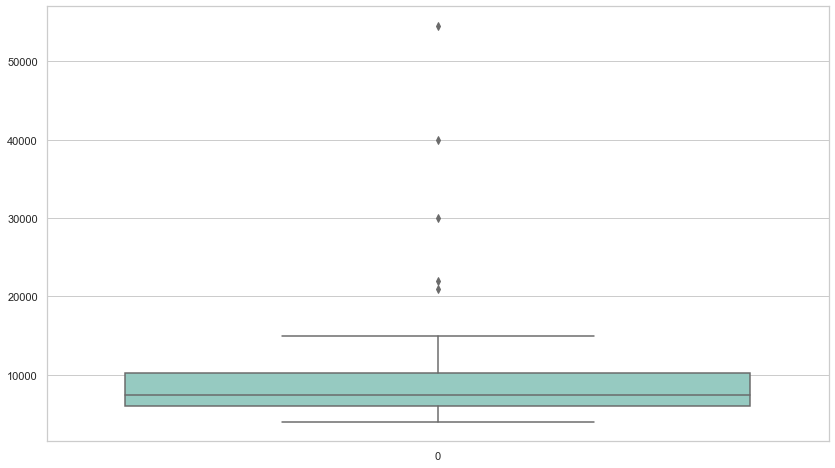

In [31]:
sns.set_style(style='whitegrid')
sns.boxplot(data=df_cred['Salário'], palette='Set3')
sns.set(rc={'figure.figsize':(14,8)})

A partir de qual valor o salário é considerado discrepante?

In [32]:
2.5*df_cred['Salário'].describe()[6] - 1.5*df_cred['Salário'].describe()[4]

16482.5

A variável salário pode ser considerada simétrica?

In [33]:
skew(df_cred['Salário'])

3.1261053339315703

**Resposta:** Não, pois para ser considereada simetrica o coeficiente de assimetria (skewness) deverá ser próximo de zero.

Existem clientes que possuem limite de cheque especial discrepante em relação aos demais clientes? Analise o boxplot. 

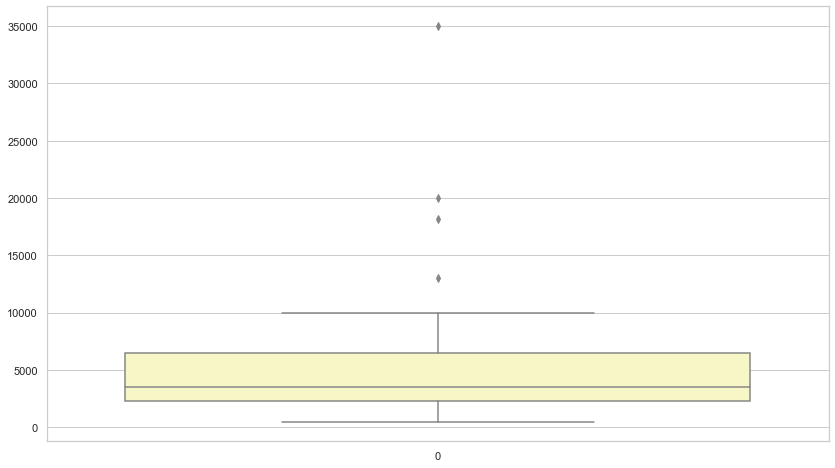

In [34]:
sns.set_style(style='whitegrid')
sns.boxplot(data=df_cred['Limite do Cheque Especial'], palette='Spectral_r')
sns.set(rc={'figure.figsize':(14,8)})

A partir de qual valor o limite de cheque especial é considerado discrepante?

In [35]:
2.5*df_cred['Limite do Cheque Especial'].describe()[6] - 1.5*df_cred['Limite do Cheque Especial'].describe()[4]

12856.25

A variável limite de cheque especial pode ser considerada simétrica?

In [36]:
skew(df_cred['Limite do Cheque Especial'])

2.7935197829212015

**Resposta:** Não

# Problema 2

Carregando a base de dados utilizando a biblioteca do pandas.

In [37]:
df_telecom = pd.read_excel(r"C:\Users\lucas\Desktop\Exercícios.xlsx", sheet_name='Base de Dados 2')
df_telecom.head()

,ID,Sexo,Tempo_relacionamento (anos),Num_de_Produtos,Cancelou
0,15634602,Feminino,2,1,1
1,15647311,Feminino,1,1,0
2,15619304,Feminino,8,3,1
3,15701354,Feminino,1,2,0
4,15737888,Feminino,2,1,0


In [59]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           10000 non-null  int64 
 1   Sexo                         10000 non-null  object
 2   Tempo_relacionamento (anos)  10000 non-null  int64 
 3   Num_de_Produtos              10000 non-null  int64 
 4   Cancelou                     10000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


Quantos clientes a base de dados possui? Quantos são mulheres? E de forma relativa, quantas são mulheres?

In [38]:
#Quantos clientes a base de dados possui?
df_telecom.shape[0]

10000

In [39]:
#Quantos são mulheres?
df_telecom.Sexo.loc[df_telecom.Sexo == 'Feminino'].count()

4543

In [40]:
#E de forma relativa, quantas são mulheres?
fem_rel = (df_telecom.Sexo.loc[df_telecom.Sexo == 'Feminino'].count()/df_telecom.shape[0])*100
print('De forma relativa temos {} % mulheres em nosso banco de dados.'.format(fem_rel))

De forma relativa temos 45.43 % mulheres em nosso banco de dados.


Quais são os valores da média, mediana, mínimo, máximo e quartis do tempo de relacionamento? 

In [41]:
df_telecom['Tempo_relacionamento (anos)'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tempo_relacionamento (anos), dtype: float64

- Mínimo = 0
- Máximo = 10
- Mediana = 5
- 1º Quartil = 3
- 3º Quartil = 7

Com base na distribuição de frequências do tempo de relacionamento, qual a proporção de clientes que ainda não completaram um ano de relacionamento? 


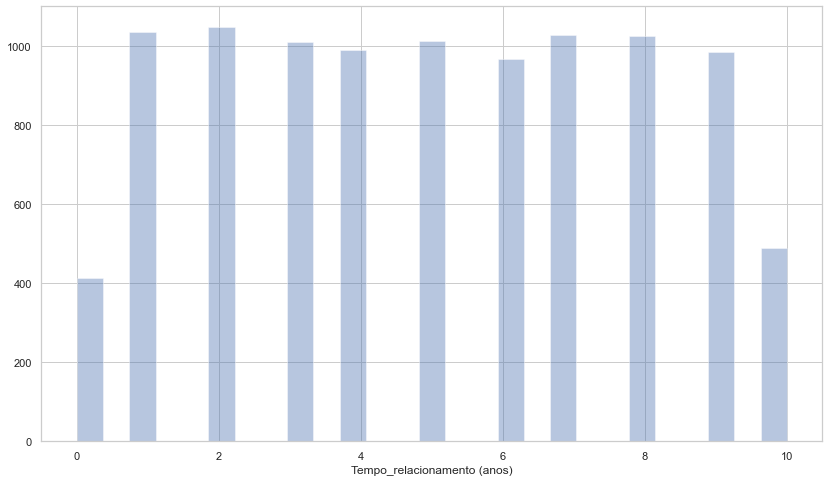

In [42]:
sns.set_style(style='whitegrid')
sns.distplot(df_telecom["Tempo_relacionamento (anos)"], kde=False)
sns.set(rc={'figure.figsize':(14,8)})


Qual a proporção de clientes que possuem 10 anos de relacionamento?

In [43]:
rel = (df_telecom[['Tempo_relacionamento (anos)']].loc[df_telecom['Tempo_relacionamento (anos)'] == 10].count()/df_telecom.shape[0])*100
print('De forma relativa temos {} % com 10 anos de relacionamento em nosso banco de dados.'.format(rel))

De forma relativa temos Tempo_relacionamento (anos)    4.9
dtype: float64 % com 10 anos de relacionamento em nosso banco de dados.


Qual o % de clientes tem 1 produto? E 2 produtos? Utilize a variável Num_de_Produtos.

In [44]:
prod_1 = (df_telecom.ID.loc[df_telecom.Num_de_Produtos == 1].count()/df_telecom.shape[0])*100
prod_2 = (df_telecom.ID.loc[df_telecom.Num_de_Produtos == 2].count()/df_telecom.shape[0])*100
print('O percentual de clientes com 1 produto: %.2f' % prod_1)
print('O percentual de clientes com 2 produto: %.2f' % prod_2)

O percentual de clientes com 1 produto: 50.84
O percentual de clientes com 2 produto: 45.90


Qual o total de clientes que já cancelaram os produtos? E que não cancelaram? Qual a frequencia relativa de cada categoria? Considere 1 para o cliente que cancelou e 0 para o cliente que nao cancelou. 

In [45]:
can = df_telecom.Cancelou.loc[df_telecom.Cancelou == 1].count()
n_can = df_telecom.Cancelou.loc[df_telecom.Cancelou == 0].count()
print('Cancelou: %i \nNão cancelou: %i' % (can, n_can))

Cancelou: 2037 
Não cancelou: 7963


In [46]:
total = df_telecom.shape[0]
can_per = can*100/total
n_can_per = n_can*100/total
print('Cancelou: %.2f \nNão cancelou: %.2f' % (can_per, n_can_per))

Cancelou: 20.37 
Não cancelou: 79.63


# Problema 3

Carregando a base de dados.

In [47]:
df_imb = pd.read_excel(r"C:\Users\lucas\Desktop\Exercícios.xlsx", sheet_name='Base de Dados 3')
df_imb.head()

,Id_Imovel,Idade_imovel,Região,Distancia_metro_Km,Mil_reais_m2
0,1,3. Acima de 25 anos,Norte,1.083595,7.58
1,2,2. 10 a 25 anos,Sul,1.396946,8.44
2,3,2. 10 a 25 anos,Sul,1.544789,9.46
3,4,2. 10 a 25 anos,Norte,1.544789,10.96
4,5,1. Até 10 anos,Norte,1.456010,8.62


In [60]:
df_imb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id_Imovel           413 non-null    int64  
 1   Idade_imovel        413 non-null    object 
 2   Região              413 non-null    object 
 3   Distancia_metro_Km  413 non-null    float64
 4   Mil_reais_m2        413 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 16.3+ KB


Faça a distribuição de frequências da variável idade.

In [48]:
df_imb.groupby('Idade_imovel').count()['Id_Imovel']

Idade_imovel
1. Até 10 anos         109
2. 10 a 25 anos        187
3. Acima de 25 anos    117
Name: Id_Imovel, dtype: int64

O histograma da com a distribuição de frequência absolutas das idades dos imóveis. 

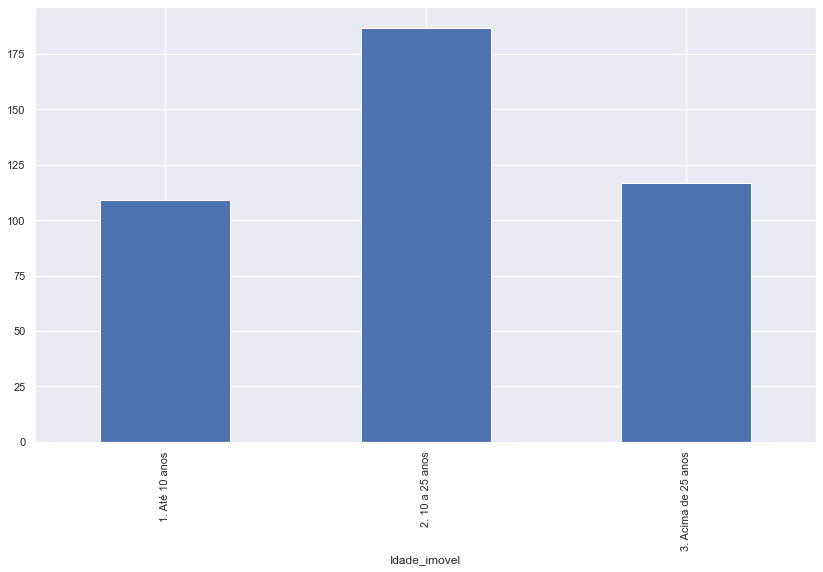

In [49]:
df_imb.groupby('Idade_imovel').size().plot.bar()

Faça a distribuição de frequências da variável região.

In [50]:
df_imb.groupby('Região').count()['Id_Imovel']

Região
Norte    155
Sul      258
Name: Id_Imovel, dtype: int64

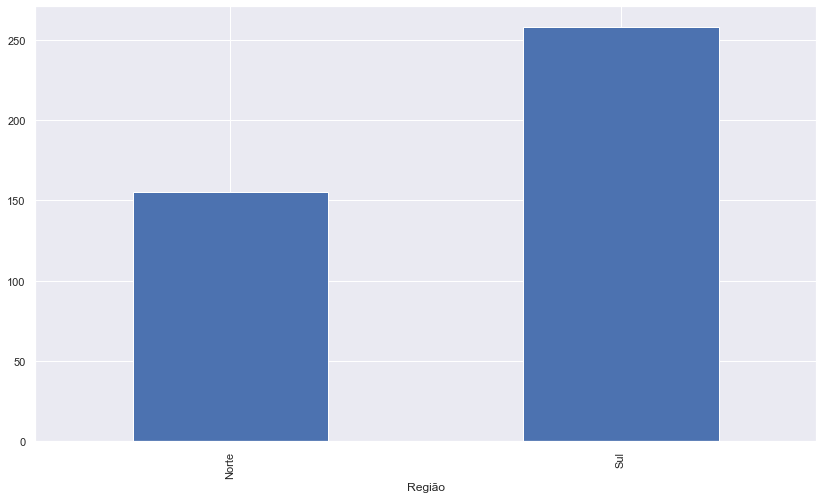

In [51]:
df_imb.groupby('Região').size().plot.bar()

Faça a distribuição de frequências conjunta entre as variáveis idade do imóvel e região. Você acredita que a idade do imóvel sofre influência da região? Qual região se destaca por ter imóveis mais novos (até 10 anos)?

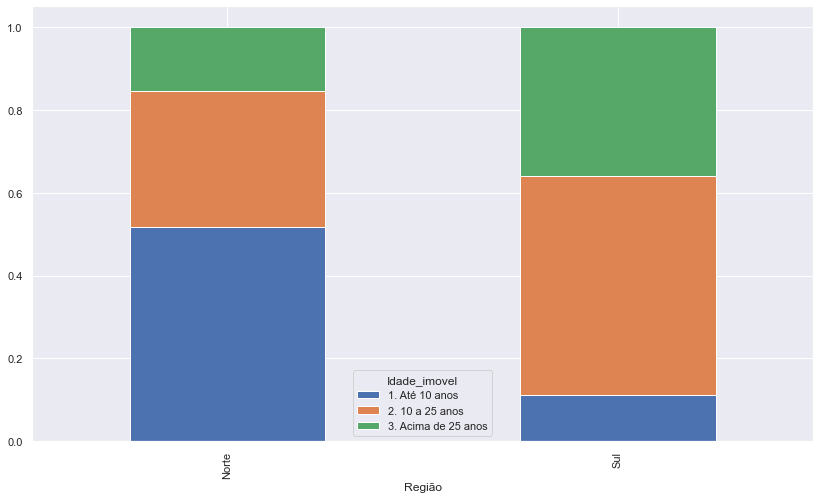

In [52]:
total_norte = df_imb.groupby(['Região','Idade_imovel']).size()['Norte'].sum()
total_sul = df_imb.groupby(['Região','Idade_imovel']).size()['Sul'].sum()

df_imb_gruped = df_imb.groupby(['Região','Idade_imovel']).size()
df_imb_gruped[0:3] = df_imb_gruped[0:3]/total_norte
df_imb_gruped[3:] = df_imb_gruped[3:]/total_sul

df_imb_gruped.unstack().plot.bar(stacked=True, figsize = (14,8))

Qual o valor do mínimo, máximo, mediana, Q1 e Q3 da variável distância ao metrô? Interprete os valores. 

In [53]:
df_imb.Distancia_metro_Km.describe()

count    413.000000
mean       1.559994
std        0.273329
min        0.769043
25%        1.382801
50%        1.512455
75%        1.777023
max        2.141636
Name: Distancia_metro_Km, dtype: float64

- Mínimo = 0.76
- Máximo = 2.14
- Mediana = 1.51
- 1º Quartil = 1.38
- 3º Quartil = 1.77

Qual o valor do mínimo, máximo, mediana, Q1 e Q3 da variável valor do imóvel (R$ mil) por m2? Interprete os valores. 

In [54]:
df_imb.Mil_reais_m2.describe()

count    413.000000
mean       7.557530
std        2.609219
min        1.520000
25%        5.540000
50%        7.680000
75%        9.320000
max       15.660000
Name: Mil_reais_m2, dtype: float64

- Mínimo = 1.52
- Máximo = 15.66
- Mediana = 7.68
- 1º Quartil = 5.54
- 3º Quartil = 9.32

Faça o gráfico de dispersão entre a distância ao metrô e o valor do imóvel (R$ mil) por m2. Você acredita que, em geral, quanto maior a distância do imóvel até o metrô, menor o seu valor?


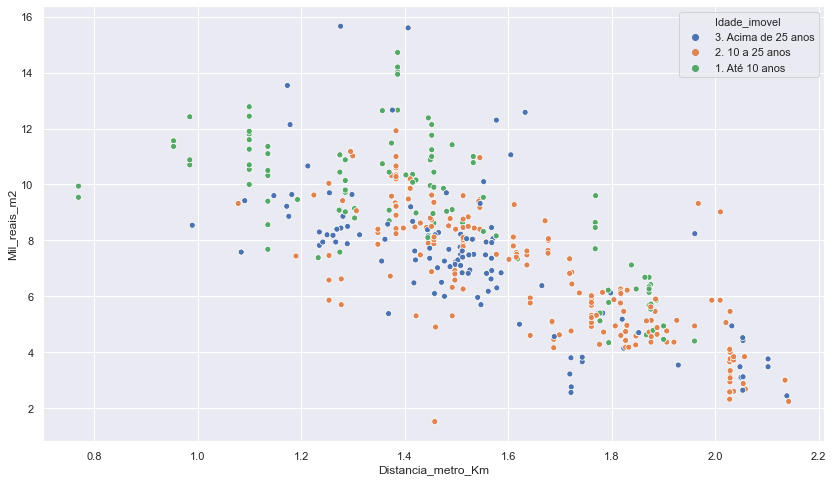

In [58]:
sns.scatterplot(data=df_imb, x = "Distancia_metro_Km", y = 'Mil_reais_m2', hue='Idade_imovel') #coloração definida pela idade do imóvel

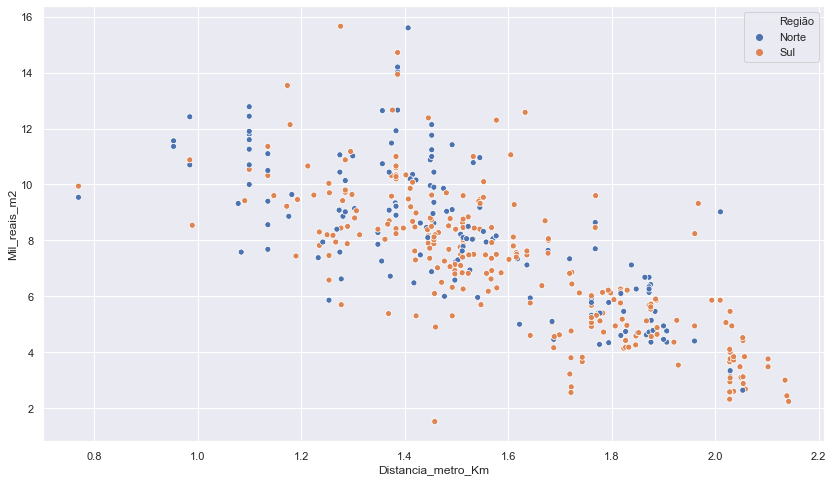

In [56]:
sns.scatterplot(data=df_imb, x = "Distancia_metro_Km", y = 'Mil_reais_m2', hue='Região')